In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras import backend as K
from keras.models import Model
import numpy as np
from keras.models import load_model
from keras import optimizers


Using TensorFlow backend.


In [2]:
from keras.applications.resnet50 import ResNet50


In [3]:
base_model = ResNet50(weights='imagenet', include_top=False)


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [4]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(10, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
# for layer in base_model.layers:
#     layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [5]:
batch_size = 8
num_classes = 10
epochs = 3

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_test,y_test), (x_train,y_train) = mnist.load_data()

In [6]:
# x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
# x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_train = np.squeeze(np.stack((x_train,) * 3, -1))
x_test = np.squeeze(np.stack((x_test,) * 3, -1))


input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (10000, 28, 28, 3)
10000 train samples
60000 test samples


In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test))
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [9]:
# model.save("teacher_10-60.h5")

In [10]:
model = load_model("teacher_10-60.h5")

Instructions for updating:
Use tf.cast instead.


In [11]:
y_test[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [12]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

In [13]:
temp = np.concatenate((x_test,x_train))
temp1 = np.argmax(np.concatenate((y_test,y_train)), axis = 1)
temp1.shape

(70000,)

In [14]:
y_pred1 = model.predict(temp)

In [15]:
y_pred1.shape

(70000, 10)

In [16]:
np.savetxt("probabilities.csv", y_pred1, delimiter=",")

In [17]:
y_test_scalar = np.argmax(y_test, axis=1)
y_test_scalar

array([5, 0, 4, ..., 5, 6, 8])

In [18]:
from sklearn.metrics import confusion_matrix
import numpy as np

confusion = confusion_matrix(y_test_scalar, y_pred)

In [19]:
confusion

array([[5754,    1,   18,    0,    3,    6,   24,    0,   45,   72],
       [   3, 6482,  134,    0,   73,    0,    4,   22,   17,    7],
       [   6,    8, 5840,    0,   15,    1,    0,   34,   39,   15],
       [  17,   12,  292, 4924,    3,  217,    0,   11,   45,  610],
       [   4,    1,   10,    0, 5760,    0,    4,    3,    0,   60],
       [  12,    3,   14,    3,    5, 5248,   66,    0,   14,   56],
       [  75,    2,   20,    0,   14,    5, 5780,    0,   20,    2],
       [  47,   11,  149,    1,   26,   15,    0, 5911,    7,   98],
       [  16,    3,   26,    0,    9,   46,   20,    1, 5533,  197],
       [  14,    0,    5,    0,   46,   10,    0,   13,   10, 5851]])

In [20]:
print(y_pred[0:5])
print(y_test_scalar[0:5])

[5 0 4 1 9]
[5 0 4 1 9]


In [21]:
print(len(y_pred))
print(len(y_test_scalar))
print(len(list(x_train)))

60000
60000
10000


In [22]:
# import pandas as pd
# df = pd.DataFrame(
#     {'y_pred': y_pred,
#      'y_true': y_test_scalar,
#      'image': list(x_test)
#     })

In [23]:
# df.to_csv("conf.csv")

# PART 1 DONE
## Part 2 - Pick a random false positive and generate images using VAE

In [24]:
print(y_pred.shape)
print(y_test.shape)
print(y_test_scalar.shape)

(60000,)
(60000, 10)
(60000,)


In [25]:
y_pred_scalar = y_pred
y_pred = keras.utils.to_categorical(y_pred_scalar, num_classes)



In [26]:
y_pred.shape

(60000, 10)

In [29]:
x_test.shape

(60000, 28, 28, 3)

In [85]:
count = 512
x_student = []
y_student = []
# for i in zip(x_test,y_pred_scalar,y_test_scalar):
#     if count == 0:
#         break
#     if i[1] == 2 and i[2] == 7:
#         x_student.append(i[0])
#         y_student.append(i[1])
#         count = count - 1
    

In [86]:
# for i in zip(x_test,y_pred_scalar,y_test_scalar):
#     if count == 0:
#         break
#     if i[1] == 7 and i[2] == 2:
#         x_student.append(i[0])
#         y_student.append(i[1])
#         count -= 1


In [87]:
len(x_student)

0

In [52]:
for i in zip(x_test,y_pred_scalar,y_test_scalar):
    if count == 256:
        break
    if i[1] == 7 and i[2] == 7:
        x_student.append(i[0])
        y_student.append(i[1])
        count = count - 1

In [88]:
for i in zip(x_test,y_pred_scalar,y_test_scalar):
    if count == 0:
        break
    if i[1] == 2 and i[2] == 2:
#         x_student.append(i[0])
        x_student.append(x_test[0])
        y_student.append(i[1])
        count = count - 1

In [89]:
len(x_student)

512

In [90]:
y_student

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [91]:
np.array(x_student).shape

(512, 28, 28, 3)

In [92]:
y_student_scalar = y_student

In [93]:
model1 = Sequential()
# model1.add(Dense(32, activation='relu', input_dim=784))
model1.add(Dense(10, activation='softmax',input_dim = 784))
model1.compile(optimizer=keras.optimizers.SGD( momentum=0.0, nesterov=False),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



# Convert labels to categorical one-hot encoding
y_student = keras.utils.to_categorical(y_student_scalar, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
# model.fit(data, one_hot_labels, epochs=10, batch_size=32)

In [94]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [95]:
x_student = np.array(x_student)
x_student = x_student[:,:,:,0]
x_student.shape

(512, 28, 28)

In [96]:
x_student = x_student.reshape(512,784)

In [97]:
x_student.shape

(512, 784)

In [98]:
model1.fit(x_student, y_student, epochs=50, batch_size=64)

Epoch 1/50
512/512 [==============================] - 2s 4ms/step - loss: 0.9172 - acc: 0.7500 
Epoch 2/50
512/512 [==============================] - 0s 62us/step - loss: 0.1174 - acc: 1.0000
Epoch 3/50
512/512 [==============================] - 0s 44us/step - loss: 0.0599 - acc: 1.0000
Epoch 4/50
512/512 [==============================] - 0s 49us/step - loss: 0.0402 - acc: 1.0000
Epoch 5/50
512/512 [==============================] - 0s 35us/step - loss: 0.0303 - acc: 1.0000
Epoch 6/50
512/512 [==============================] - 0s 46us/step - loss: 0.0243 - acc: 1.0000
Epoch 7/50
512/512 [==============================] - 0s 48us/step - loss: 0.0202 - acc: 1.0000
Epoch 8/50
512/512 [==============================] - 0s 34us/step - loss: 0.0174 - acc: 1.0000
Epoch 9/50
512/512 [==============================] - 0s 47us/step - loss: 0.0152 - acc: 1.0000
Epoch 10/50
512/512 [==============================] - 0s 47us/step - loss: 0.0135 - acc: 1.0000
Epoch 11/50
512/512 [==================

In [99]:
temp = model1.get_weights()

In [100]:
temp[0].shape

(784, 10)

In [111]:
restructured_weights = temp[0].reshape(28,28,10)

In [102]:
# restructured_weights.shape

In [103]:
# restructured_weights = restructured_weights * 255

In [104]:
# restructured_weights  = np.uint8(restructured_weights)

In [105]:
# restructured_weights = restructured_weights / 255

In [114]:
from sklearn.preprocessing import minmax_scale

restructured_weights =  minmax_scale(restructured_weights[:,:,0])

In [115]:
restructured_weights.shape

(28, 28)

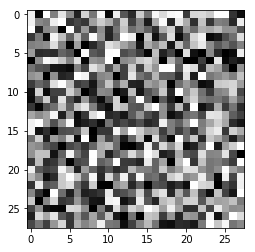

In [116]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline


plt.imshow(restructured_weights,cmap='gray')